<a href="https://colab.research.google.com/github/AchmadMIftakhulRA/ComputationalIntelligenceTask/blob/main/Project_UTS__Achmad_Miftakhul_Rachman_Ardiva_2106705820.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TUGAS UTS KOMPUTASI INTELEJENSIA**

**NAMA** : Achmad Miftakhul Rachman Ardiva

**NPM** : 2106705820

# Analisis Integrasi YOLO dan Transformer untuk Analisis Perilaku

Notebook ini bertujuan untuk mengeksplorasi aspek teknis penggabungan model deteksi objek YOLO (You Only Look Once) dengan model Transformer dalam analisis perilaku objek pada urutan video. Kombinasi ini dirancang untuk menciptakan pipeline yang mampu mendeteksi objek secara real-time dengan YOLO dan memanfaatkan koordinat bounding box dari waktu ke waktu sebagai input untuk Transformer guna menganalisis pola pergerakan dan perilaku objek.

Langkah-langkah yang akan kita bahas secara rinci meliputi:

---

## 1. Pengaturan YOLO untuk Deteksi Objek

Pada langkah pertama ini, kita akan mengimplementasikan model YOLO di Google Colab, yang bertujuan untuk mendeteksi objek pada setiap frame video. YOLO adalah model deteksi objek yang dirancang untuk kecepatan tinggi, mampu melakukan deteksi objek secara real-time tanpa mengorbankan akurasi terlalu banyak. Di sini, kita akan:
   - Menginstal YOLO di Google Colab dan menyiapkan model pre-trained untuk mendeteksi objek.
   - Mengunggah video dari Google Drive atau dari komputer lokal untuk diproses.
   - Mengkonfigurasi YOLO agar menghasilkan koordinat bounding box dan label objek yang terdeteksi untuk setiap frame.

Output dari langkah ini adalah daftar koordinat bounding box yang mencakup informasi waktu dan posisi objek di setiap frame. Output inilah yang nantinya akan diolah oleh Transformer dalam analisis temporal.

---

## 2. Persiapan Output YOLO untuk Analisis Temporal dengan Transformer

Setelah mendapatkan koordinat bounding box dari YOLO, langkah berikutnya adalah mempersiapkan data tersebut untuk bisa digunakan sebagai input Transformer. Transformer dirancang untuk memproses data berurutan, dan dalam konteks ini, urutan bounding box yang dihasilkan oleh YOLO perlu disusun dalam bentuk data time-series yang sesuai.

Beberapa langkah penting dalam tahap ini meliputi:
   - **Normalisasi Data**: Mengatur skala koordinat bounding box agar konsisten dan lebih mudah diolah oleh Transformer.
   - **Penyusunan Data Berurutan**: Mengelompokkan bounding box berdasarkan ID objek untuk melacak pergerakan objek yang sama dari waktu ke waktu.
   - **Penambahan Fitur Tambahan**: Menambahkan fitur tambahan seperti kecepatan dan arah pergerakan, yang dapat membantu Transformer dalam mengenali pola perilaku.

Data hasil penyusunan ini kemudian akan diatur menjadi tensor berukuran `[sequence_length, feature_size]` yang siap untuk diproses oleh Transformer.

---

## 3. Optimasi Performa Real-Time

Untuk menjaga performa real-time, penggabungan YOLO dan Transformer membutuhkan optimasi khusus. Beberapa teknik yang dapat digunakan meliputi:

   - **Pengaturan Batch dan Ukuran Frame**: Mengurangi ukuran frame atau menggunakan batch kecil untuk mempercepat proses deteksi dan pemrosesan data.
   - **Pruning Model Transformer**: Menyederhanakan arsitektur Transformer (misalnya dengan mengurangi jumlah layer atau head) untuk meningkatkan kecepatan tanpa terlalu banyak mengorbankan akurasi.
   - **Pipeline Paralelisasi**: Menjalankan YOLO dan Transformer secara paralel, di mana YOLO mendeteksi objek sementara Transformer langsung memproses urutan bounding box yang diterima.
   - **Threshold Kepercayaan**: Mengatur ambang batas deteksi di YOLO untuk mengabaikan deteksi yang kurang signifikan, sehingga hanya objek relevan yang diproses oleh Transformer.

Kombinasi dari optimasi ini dapat membantu menjaga performa sistem agar tetap dapat digunakan secara real-time, yang penting dalam aplikasi seperti sistem pengawasan keamanan.

---

## 4. Menggunakan Transformer untuk Prediksi Perilaku Temporal

Setelah data bounding box siap dan sistem telah dioptimasi, langkah selanjutnya adalah menggunakan Transformer untuk memprediksi perilaku objek dari urutan deteksi YOLO. Transformer memiliki kemampuan untuk memahami pola temporal secara lebih baik berkat mekanisme *self-attention* yang bisa menangkap hubungan antar-frame pada jangkauan waktu yang lebih panjang dibandingkan dengan model RNN atau LSTM.

Beberapa analisis yang dapat dilakukan oleh Transformer di tahap ini meliputi:
   - **Pelacakan Pergerakan**: Mengidentifikasi pola pergerakan objek dari frame ke frame untuk melacak lintasan atau arah.
   - **Deteksi Aktivitas Anomali**: Mendeteksi perilaku tidak biasa atau aktivitas mencurigakan, misalnya pola pergerakan yang tiba-tiba atau keluar dari jalur normal.
   - **Prediksi Kecepatan dan Arah**: Mengklasifikasi kecepatan dan arah objek, seperti kendaraan dalam analisis lalu lintas, dengan memperhatikan perubahan koordinat bounding box dalam urutan waktu.

Dalam kasus seperti pengawasan keamanan, Transformer dapat memproses urutan bounding box yang dihasilkan YOLO untuk mendeteksi aktivitas anomali atau perilaku mencurigakan. Sementara itu, pada analisis lalu lintas, Transformer dapat mengidentifikasi pola pergerakan kendaraan, membantu dalam pengklasifikasian kecepatan, arah, dan bahkan memprediksi potensi kecelakaan.




# HANDS ON YOLO

**Mengimport libraries**

- **Torch**: Digunakan untuk menjalankan model YOLO dan Transformer.
- **OpenCV**: Memungkinkan pemrosesan video, seperti membaca dan menulis frame.
- **Transformers**: Menyediakan infrastruktur untuk mengimplementasikan model Transformer dalam prediksi urutan.
- Repositori **YOLOv5** mencakup konfigurasi model dan dependensi lain yang mempermudah proses setup.



In [1]:

# Install necessary libraries for YOLO, OpenCV, and Transformers
!pip install torch torchvision torchaudio
!pip install opencv-python-headless transformers

# Clone YOLOv5 repository and install its requirements
!git clone https://github.com/ultralytics/yolov5.git
!pip install -qr yolov5/requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17022, done.
remote: Total 17022 (delta 0), reused 0 (delta 0), pack-reused 17022 (from 1)
Receiving objects: 100% (17022/17022), 15.62 MiB | 22.78 MiB/s, done.
Resolving deltas: 100% (11694/11694), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 879.0/879.0 kB 15.0 MB/s eta 0:00:00


In [3]:

# Import necessary libraries and load YOLOv5 model
import torch
import cv2
import numpy as np
from google.colab import drive
from google.colab import files

# Load YOLOv5 model ('yolov5s' is a lightweight, faster version)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Mount Google Drive to access video files
drive.mount('/content/drive')
video_path = '/content/drive/MyDrive/tes video collab/bottle-detection.gif'  # Example path


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-11-2 Python-3.10.12 torch-2.5.0+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from google.colab import files
uploaded = files.upload()  # Upload a video file manually if needed

# Update video_path if you upload manually
video_path = next(iter(uploaded))  # Automatically get the uploaded file path


Saving bottle-detection.gif to bottle-detection.gif


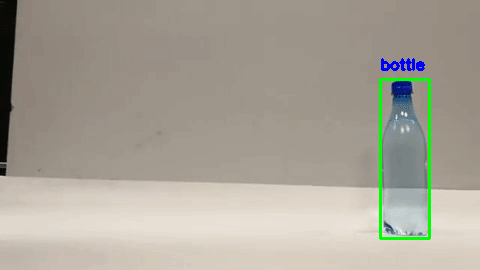

In [5]:
import cv2
from IPython.display import display, clear_output
import PIL.Image

# Load video using OpenCV
cap = cv2.VideoCapture(video_path)
output_path = '/content/drive/MyDrive/output_video.mp4'  # Save path for output
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define codec and create VideoWriter for saving output video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

# Loop through each frame in the video
while cap.isOpened():
    ret, frame = cap.read()  # Read a frame
    if not ret:
        break

    # Perform object detection
    results = model(frame)

    # Loop over each detected object
    for detection in results.xyxy[0]:
        x1, y1, x2, y2, conf, cls = map(int, detection[:6])
        label = model.names[cls]

        # Draw bounding boxes and labels on frame
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Write the processed frame to output video
    out.write(frame)

    # Convert frame to RGB format for displaying in Colab
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    pil_im = PIL.Image.fromarray(rgb_frame)

    # Display the frame in the output cell
    clear_output(wait=True)  # Clear previous output to update display
    display(pil_im)  # Show the current frame

# Release video capture and writer
cap.release()
out.release()



# Mempersiapkan Output YOLOv5 untuk Input Transformer

Untuk melakukan analisis perilaku, kita perlu mengubah deteksi dari YOLO ke dalam format yang sesuai untuk model Transformer. Proses ini penting agar data yang dihasilkan dari deteksi objek dapat dipahami dan dianalisis lebih lanjut oleh model Transformer. Berikut adalah langkah-langkah yang perlu dilakukan:

1. **Mengekstrak dan Menormalkan Koordinat**:
   - **Mengekstrak Koordinat**: Setelah objek terdeteksi menggunakan YOLOv5, kita mendapatkan koordinat dari bounding box untuk setiap objek di setiap frame video. Koordinat ini biasanya terdiri dari posisi sudut kiri atas (x1, y1) dan sudut kanan bawah (x2, y2).
   - **Normalisasi Koordinat**: Koordinat bounding box perlu dinormalisasi agar berada dalam rentang 0 hingga 1. Ini dilakukan dengan membagi nilai koordinat dengan lebar dan tinggi frame. Normalisasi penting untuk membuat data konsisten, sehingga model Transformer dapat lebih mudah memproses dan memahami pola perilaku objek yang terdeteksi.

2. **Menyusun Data berdasarkan ID Objek dan Frame**:
   - **Identifikasi Objek**: Setiap objek yang terdeteksi perlu diberikan ID unik untuk melacak keberadaannya dari frame ke frame. Ini memungkinkan kita untuk mengikuti objek yang sama sepanjang video.
   - **Menyusun Data**: Setelah memberikan ID pada setiap objek, data perlu disusun dalam format yang mengelompokkan semua deteksi berdasarkan ID objek. Ini berarti setiap ID objek akan memiliki urutan data yang menunjukkan posisi dan ukuran objek pada setiap frame. Dengan cara ini, kita dapat menjaga konsistensi dan integritas data, yang penting untuk analisis temporal.
   - **Menjaga Konsistensi**: Penting untuk memastikan bahwa ID objek yang sama tetap konsisten di seluruh frame video, sehingga ketika model Transformer menerima data, ia dapat memahami bahwa data yang diterima berasal dari objek yang sama.

Dengan langkah-langkah di atas, kita telah mempersiapkan output dari YOLOv5 menjadi format yang siap digunakan sebagai input untuk model Transformer, memungkinkan analisis perilaku objek dalam video secara lebih efektif dan efisien.


In [6]:

# Normalize bounding box coordinates
def normalize_coordinates(detections, frame_width, frame_height):
    normalized_detections = []
    for det in detections:
        x1, y1, x2, y2, conf, cls = det
        norm_x1, norm_y1 = x1 / frame_width, y1 / frame_height
        norm_x2, norm_y2 = x2 / frame_width, y2 / frame_height
        normalized_detections.append([norm_x1, norm_y1, norm_x2, norm_y2, conf, cls])
    return normalized_detections

# Example usage:
detections = results.xyxy[0].cpu().numpy()  # YOLO output to numpy array
frame_width, frame_height = width, height
normalized_detections = normalize_coordinates(detections, frame_width, frame_height)


In [7]:
from google.colab import files
files.download(output_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>